## Importing the necessary libraries

In [75]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Data Exploration and Preprocessing

In [76]:
## Load dozzy dataset
df = pd.read_csv('../dozzy_data.csv')
df.head()

,q1,q2,q3,q4,q5,q6,q7,chronotype,timestamp,id,score_variance,confidence
0,0,2,1,1,0,0,0,Night Owl,2025-03-14 02:08:53,1,0.619048,60.0
1,2,1,1,0,2,3,0,Night Owl,2025-03-14 02:08:53,2,1.238095,60.0
2,1,1,0,0,1,0,0,Night Owl,2025-03-14 02:08:53,3,0.285714,60.0
3,2,0,0,1,0,2,0,Night Owl,2025-03-14 02:08:53,4,0.904762,60.0
4,5,5,4,2,5,4,4,Morning Lark,2025-03-14 02:08:53,5,1.142857,60.0


In [77]:
df['chronotype'] = pd.Categorical(df['chronotype'])
df.head()


,q1,q2,q3,q4,q5,q6,q7,chronotype,timestamp,id,score_variance,confidence
0,0,2,1,1,0,0,0,Night Owl,2025-03-14 02:08:53,1,0.619048,60.0
1,2,1,1,0,2,3,0,Night Owl,2025-03-14 02:08:53,2,1.238095,60.0
2,1,1,0,0,1,0,0,Night Owl,2025-03-14 02:08:53,3,0.285714,60.0
3,2,0,0,1,0,2,0,Night Owl,2025-03-14 02:08:53,4,0.904762,60.0
4,5,5,4,2,5,4,4,Morning Lark,2025-03-14 02:08:53,5,1.142857,60.0


In [78]:
## Check the columns and rows of the data - the shape of the data
df.shape

(300, 12)

In [79]:
## Checking the datatypes making sure that every data is clear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   q1              300 non-null    int64   
 1   q2              300 non-null    int64   
 2   q3              300 non-null    int64   
 3   q4              300 non-null    int64   
 4   q5              300 non-null    int64   
 5   q6              300 non-null    int64   
 6   q7              300 non-null    int64   
 7   chronotype      300 non-null    category
 8   timestamp       300 non-null    object  
 9   id              300 non-null    int64   
 10  score_variance  300 non-null    float64 
 11  confidence      300 non-null    float64 
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 26.3+ KB


In [80]:
## Checking the missing values
df.isnull().sum()

q1                0
q2                0
q3                0
q4                0
q5                0
q6                0
q7                0
chronotype        0
timestamp         0
id                0
score_variance    0
confidence        0
dtype: int64

In [81]:
# df.corr()

Text(0, 0.5, 'chronotype')

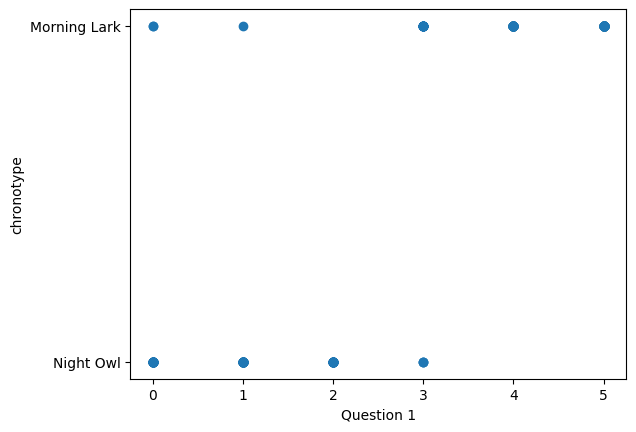

In [82]:
plt.scatter(df["q1"], df["chronotype"])
plt.xlabel("Question 1")
plt.ylabel("chronotype")

## Feature Engineering

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['chronotype'] = le.fit_transform(df['chronotype'])

In [84]:
## dropping the unneccessary fields in the dataset. - Timestamp, Id, Score_variance, ...
df.drop(columns=['timestamp', 'id', 'score_variance'], inplace=True)

In [85]:
## Identify the data.. - categorical(target values - y) and numerical data(X)
## Dependent and Independent variable

X = df.iloc[:, :7]
y = df['chronotype']



In [86]:
## Split the data into train, validation, and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 80/20 split

In [87]:
## Scaling the data to have a good convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train)

In [89]:
X_test_scaled = scaler.transform(X_test)

In [90]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

## Model Training

In [91]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)

In [92]:
regressor.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [93]:
## Check the coeficients..
print(regressor.coef_)

[[-0.99071922 -0.99933878 -1.04374641 -0.78993124 -1.00805882 -0.87298353
  -0.90364468]]


In [94]:
## Prediction with test data... lets say (X_test)
predictions = regressor.predict(X_test_scaled)
predictions

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

## Plot analysis

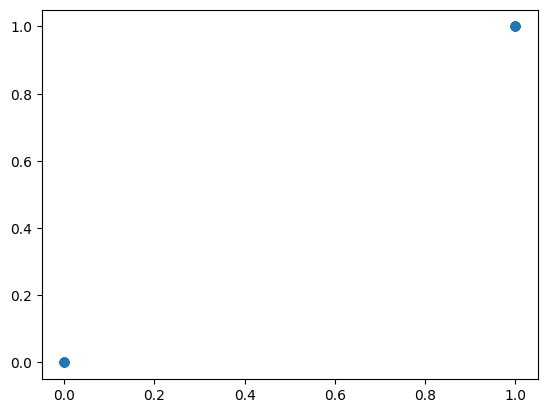

In [95]:
## Compare predictions along with the original values
plt.scatter(y_test, predictions)

In [96]:
## Error - The difference between true value and predicted value
error = y_test - predictions
error

203    0
266    0
152    0
9      0
233    0
226    0
196    0
109    0
5      0
175    0
237    0
57     0
218    0
45     0
182    0
221    0
289    0
211    0
148    0
165    0
78     0
113    0
249    0
250    0
104    0
42     0
281    0
295    0
157    0
238    0
17     0
164    0
33     0
24     0
215    0
119    0
7      0
90     0
46     0
73     0
93     0
76     0
286    0
60     0
77     0
63     0
234    0
229    0
111    0
231    0
180    0
144    0
239    0
75     0
297    0
278    0
97     0
92     0
192    0
25     0
Name: chronotype, dtype: int64

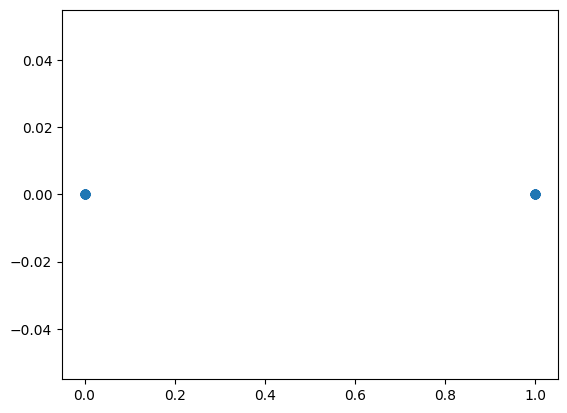

In [97]:
plt.scatter(y_test, error)

## Performance Metrics

In [98]:
## Implementing the mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

logloss = log_loss(y_test, predictions)
print(logloss)

2.220446049250313e-16


In [99]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print(score)

1.0


In [100]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

1.0

In [101]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [102]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0


In [103]:
## Confusion matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[34  0]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [104]:
# validation_pred = regressor.predict(X_val)
# validation_pred

In [105]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Prepare for the new data

In [106]:
import pickle

## Model for development

In [107]:
# pickle.dump(regressor, open('dozzy_model.pkl', 'wb'))

In [108]:
# pickled_model = pickle.load(open('dozzy_model.pkl', 'rb'))

In [109]:
# Save the scaler and model
with open('scaling.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('dozzy_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

print("Scaler and model saved successfully!")

Scaler and model saved successfully!
